### 10장 딥러닝 모델 설계하기 - 폐암환자 예제

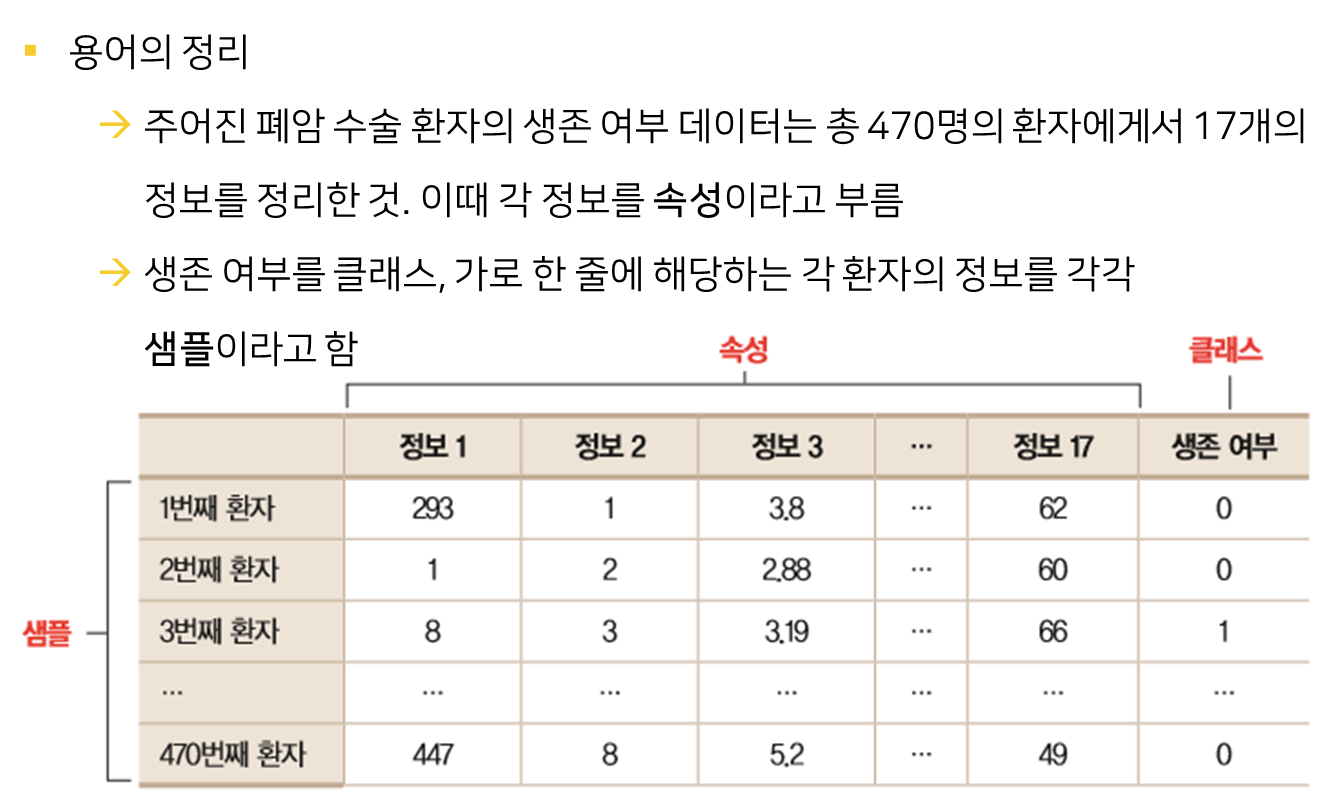

[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning/blob/master/colab/ch10-colab.ipynb)

### 1. 환경 준비 

In [1]:
# 텐서플로 라이브러리 안에 있는 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense   

# 데이터를 다루는 데 필요한 라이브러리를 불러옵니다.
import numpy as np

### 2. 데이터 준비

In [2]:
# 깃허브에 준비된 데이터를 가져옵니다.
# !git clone https://github.com/taehojo/data.git   

# 준비된 수술 환자 데이터를 불러옵니다.
Data_set = np.loadtxt("../data/ThoraricSurgery3.csv", delimiter=",")  
X = Data_set[:,0:16]    # 환자의 진찰 기록을 X로 지정합니다.
y = Data_set[:,16]      # 수술 1년 후 사망/생존 여부를 y로 지정합니다.

In [3]:
X.shape, X

((470, 16),
 array([[ 1.  ,  2.88,  2.16, ...,  1.  ,  0.  , 60.  ],
        [ 2.  ,  3.4 ,  1.88, ...,  1.  ,  0.  , 51.  ],
        [ 2.  ,  2.76,  2.08, ...,  1.  ,  0.  , 59.  ],
        ...,
        [ 2.  ,  3.04,  2.08, ...,  0.  ,  0.  , 52.  ],
        [ 2.  ,  1.96,  1.68, ...,  1.  ,  0.  , 79.  ],
        [ 2.  ,  4.72,  3.56, ...,  1.  ,  0.  , 51.  ]], shape=(470, 16)))

### 3. 구조 결정 

In [4]:
# 딥러닝 모델의 구조를 결정합니다.
model = Sequential()                                                   
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

d:\Users\admin\anaconda3\envs\py310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
from tensorflow.keras.layers import Input
model = Sequential([
    Input(shape=(16,)),
    Dense(30, activation='relu'),
    Dense(1, activation='sigmoid')
])

### 4. 모델 실행 

In [9]:
# 딥러닝 모델을 실행합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(X, y, epochs=5, batch_size=16)

Epoch 1/5


30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6894 - loss: 0.8710
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8340 - loss: 0.5133
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8489 - loss: 0.4607
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8511 - loss: 0.4511
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8511 - loss: 0.4480


<Axes: >

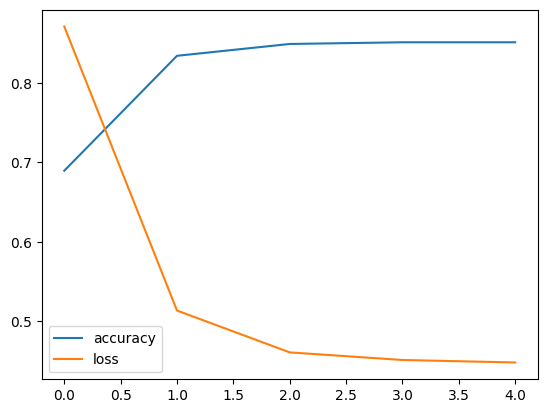

In [10]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [11]:
model.predict(X)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[0.17394872],
       [0.24016654],
       [0.21540599],
       [0.2649654 ],
       [0.207057  ],
       [0.2670463 ],
       [0.20973998],
       [0.16304675],
       [0.20356594],
       [0.24464868],
       [0.31120712],
       [0.25392696],
       [0.20607167],
       [0.10890673],
       [0.12461969],
       [0.23095378],
       [0.2812745 ],
       [0.16824216],
       [0.13465372],
       [0.18363056],
       [0.2782485 ],
       [0.22859731],
       [0.1841886 ],
       [0.20878042],
       [0.3628055 ],
       [0.03334081],
       [0.23793627],
       [0.22245334],
       [0.27992615],
       [0.32059348],
       [0.23435107],
       [0.26200187],
       [0.17369421],
       [0.15799819],
       [0.1349946 ],
       [0.22188912],
       [0.13516073],
       [0.29126567],
       [0.25698048],
       [0.28799984],
       [0.28803012],
       [0.16331564],
       [0.17527787],
       [0.31215385],
       [0.1686308 ],
       [0.22316898],
       [0.18845955],
       [0.136

In [12]:
## Parameter Set : weights
w = model.get_weights()
w

[array([[ 0.10656735, -0.05292248, -0.04841289,  0.06656029, -0.21567462,
         -0.286972  ,  0.24121   ,  0.26645976,  0.25692752,  0.2928746 ,
          0.04123262, -0.23226036, -0.16101897, -0.19966422,  0.0061305 ,
          0.18711814,  0.03015575, -0.0297564 ,  0.31729192,  0.27066353,
         -0.32808185, -0.19294421, -0.31865165, -0.15768406, -0.05720603,
          0.29314485, -0.277394  ,  0.3501682 ,  0.01509175,  0.11694275],
        [-0.21397862, -0.19454548, -0.09623826, -0.02672549,  0.21475384,
         -0.18993185, -0.13819614,  0.28242242, -0.19800015, -0.12826519,
          0.15774798,  0.1093379 ,  0.01913479, -0.36440325, -0.0882093 ,
          0.23515017,  0.01170078, -0.31208754,  0.24860832, -0.17205733,
         -0.13868985,  0.2892767 ,  0.11871933,  0.1903297 ,  0.04108453,
         -0.31214246,  0.25452414,  0.3024676 , -0.20834254,  0.23188643],
        [-0.360325  ,  0.3237808 ,  0.07438377, -0.19004017, -0.10950343,
         -0.31975058,  0.27882594,  

In [13]:
len(w)

4

In [14]:
w[0].shape

(16, 30)

In [15]:
w[1].shape

(30,)

In [16]:
w[2].shape

(30, 1)

In [17]:
w[3].shape

(1,)

In [18]:
####################################################################
# 폐암환자 예제 (2진분류) : numpy로 구현
#####################################################################
import numpy as np

# 준비된 수술 환자 데이터를 불러옵니다.
Data_set = np.loadtxt("../data/ThoraricSurgery3.csv", delimiter=",")  
X = Data_set[:, 0:16]    # 환자의 진찰 기록을 X로 지정합니다.
y = Data_set[:, [16]]      # 수술 1년 후 사망/생존 여부를 y로 지정합니다.

# 시그모이드 함수와 그 미분
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## sigmoid 함수의 미분
def sigmoid_derivative(y):
    return y * (1 - y)

# 하이퍼파라미터
learning_rate = 0.001
np.random.seed(0)

# 가중치와 바이어스 초기화
# 입력층 -> 첫 번째 히든 레이어 (16 -> 30)
W1 = np.random.normal(size=(16, 30))
b1 = np.random.normal(size=(30))
# 첫 번째 히든 레이어 -> 두 번째 히든 레이어 (30 -> 8)
W2 = np.random.normal(size=(30, 8))
b2 = np.random.normal(size=(8))
# 두 번째 히든 레이어 -> 출력층 (8 -> 1)
W3 = np.random.normal(size=(8, 1))
b3 = np.random.normal(size=(1))
cost_list = []
accuracy_list = []

# 훈련
for step in range(101):
    # Forward propagation
    layer1 = sigmoid(np.dot(X, W1) + b1)       # 첫 번째 히든 레이어
    layer2 = sigmoid(np.dot(layer1, W2) + b2)  # 두 번째 히든 레이어
    hypothesis = sigmoid(np.dot(layer2, W3) + b3)  # 출력층
    predicted = (hypothesis > 0.5).astype(np.float32)
    accuracy = np.mean(predicted == y)

    # 비용 함수 계산 (Binary Cross-Entropy)
    cost = -np.mean(y * np.log(hypothesis) + (1 - y) * np.log(1 - hypothesis))
    
    cost_list.append(cost)    
    accuracy_list.append(accuracy)
    
    # Backward propagation
    # 출력층 에러
    error = hypothesis - y
    dError_dhypothesis = error * sigmoid_derivative(hypothesis)
    
    # 두 번째 히든 레이어 에러
    layer2_error = np.dot(dError_dhypothesis, W3.T)
    dhypothesis_dlayer2 = layer2_error * sigmoid_derivative(layer2)
    
    # 첫 번째 히든 레이어 에러
    layer1_error = np.dot(dhypothesis_dlayer2, W2.T)
    dlayer2_dlayer1 = layer1_error * sigmoid_derivative(layer1)
    
    # 가중치와 바이어스 업데이트
    W3 -= learning_rate * np.dot(layer2.T, dError_dhypothesis)
    b3 -= learning_rate * np.sum(dError_dhypothesis, axis=0)
    W2 -= learning_rate * np.dot(layer1.T, dhypothesis_dlayer2)
    b2 -= learning_rate * np.sum(dhypothesis_dlayer2, axis=0)
    W1 -= learning_rate * np.dot(X.T, dlayer2_dlayer1)
    b1 -= learning_rate * np.sum(dlayer2_dlayer1, axis=0)
    
    # 출력
    if step % 10 == 0:
        # print(step, cost, W3.flatten())
        print(step, cost, accuracy)

# 최종 결과
layer1 = sigmoid(np.dot(X, W1) + b1)
layer2 = sigmoid(np.dot(layer1, W2) + b2)
hypothesis = sigmoid(np.dot(layer2, W3) + b3)
predicted = (hypothesis > 0.5).astype(np.float32)
accuracy = np.mean(predicted == y)

print("\nHypothesis:\n", hypothesis)
print("\nCorrect:\n", predicted)
print("\nAccuracy:\n", accuracy)

0 0.46305705971827266 0.8468085106382979
10 0.43221059666001904 0.851063829787234
20 0.4271456359401742 0.851063829787234
30 0.42508656831007435 0.851063829787234
40 0.4241357568432089 0.851063829787234
50 0.4236613235400848 0.851063829787234
60 0.4234092275311045 0.851063829787234
70 0.42326607422497875 0.851063829787234
80 0.42317779212866913 0.851063829787234
90 0.42311746996774446 0.851063829787234
100 0.423071344459399 0.851063829787234

Hypothesis:
 [[0.1462896 ]
 [0.14632032]
 [0.14640239]
 [0.14696339]
 [0.14653006]
 [0.14670799]
 [0.1462255 ]
 [0.14671839]
 [0.1465191 ]
 [0.14642193]
 [0.14635431]
 [0.14612481]
 [0.14662789]
 [0.14627502]
 [0.14631279]
 [0.14614814]
 [0.14633146]
 [0.14630771]
 [0.1462825 ]
 [0.14636993]
 [0.1456096 ]
 [0.14629097]
 [0.14629249]
 [0.14647389]
 [0.1464141 ]
 [0.20392915]
 [0.14640291]
 [0.14665546]
 [0.14696774]
 [0.14633908]
 [0.1467528 ]
 [0.14629205]
 [0.14627962]
 [0.14629534]
 [0.14644989]
 [0.14645211]
 [0.146281  ]
 [0.14630751]
 [0.1464

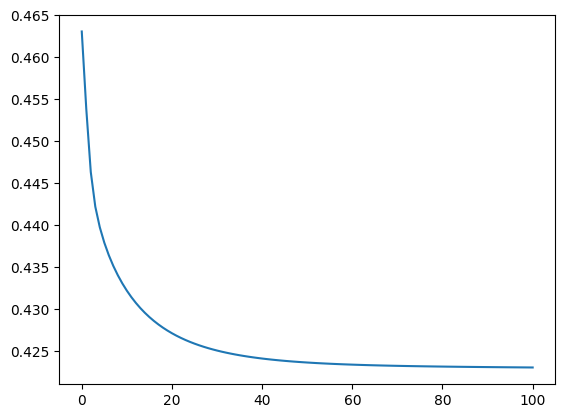

In [19]:
import matplotlib.pyplot as plt
plt.plot(cost_list)

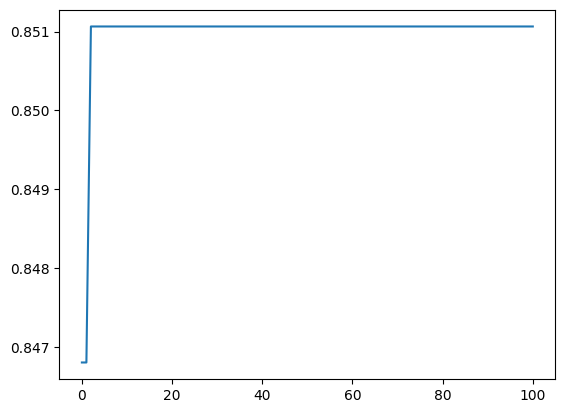

In [20]:
plt.plot(accuracy_list)

In [21]:
## 당뇨데이터를 활용한 당뇨 예측 : 케라스로 구현

# 필요한 라이브러리를 불러옵니다.
import numpy as np
import tensorflow as tf
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

#당뇨병 데이타 읽어오기
data = np.loadtxt("../data/data-03-diabetes.csv", delimiter =",")
x_data = data[:, 0:-1]   #판단 data (실수 8개)
y_data = data[:, -1]    #결과 data (1/0 1개)

# 딥러닝 구조를 결정합니다(모델을 설정하고 실행하는 부분입니다).
model = Sequential()

model.add(Dense(30, input_dim=8, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 딥러닝을 실행합니다.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(x_data, y_data, epochs=30, batch_size=10)

# 결과를 출력합니다.
print(model.evaluate(x_data, y_data))


d:\Users\admin\anaconda3\envs\py310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6588 - loss: 0.2170
Epoch 2/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7181 - loss: 0.1862
Epoch 3/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7628 - loss: 0.1673
Epoch 4/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7642 - loss: 0.1585
Epoch 5/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7668 - loss: 0.1547
Epoch 6/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 153ms/step - accuracy: 0.7681 - loss: 0.1527
Epoch 7/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.7734 - loss: 0.1513
Epoch 8/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.7760 - loss: 0.1502
Epoch 9/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7800 - loss: 0.1493
Epoch 10/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7800 - loss: 0.1484
Epoch 11/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7773 - loss: 0.1476
Epoch 12/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy:

c:\Users\dlwlg\anaconda3\envs\py310_yolo\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - loss: 72339.3828
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 70527.7344
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 69236.9844
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 68170.1172
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 67233.1953
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 66382.7266
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 65594.5234
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 64853.5352
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 64149.7305
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 63476.0039
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 62827.1719
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 62199.2812
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 61589.2812
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 60994.7266
Epoch 15/1000


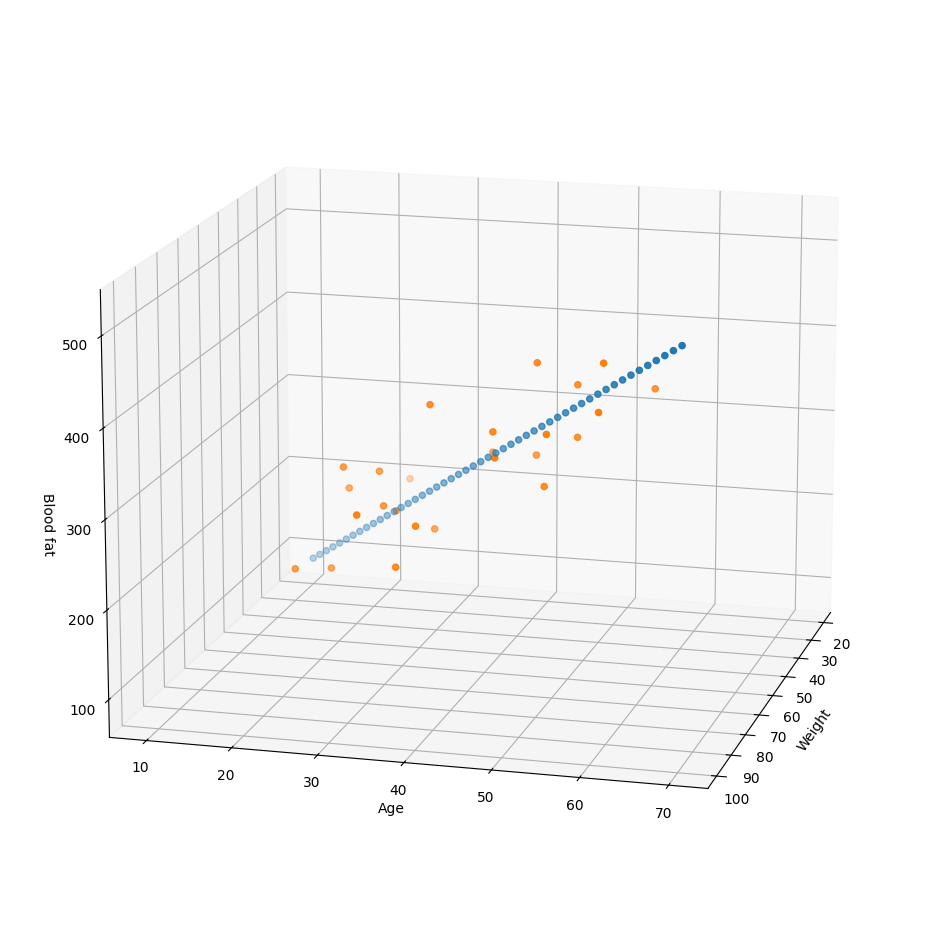

In [1]:
###################################################
# Keras : 다중 선형회귀 (Bloodfat 예제)
###################################################

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from mpl_toolkits.mplot3d import Axes3D

raw_data = np.loadtxt("../data/Blood_fat.csv", delimiter=",")
xs = np.array(raw_data[:, 0], dtype=np.float32)
ys = np.array(raw_data[:, 1], dtype=np.float32)
zs = np.array(raw_data[:, 2], dtype=np.float32)
x_data = np.array(raw_data[:, 0:2], dtype=np.float32)
y_data = np.array(raw_data[:, 2], dtype=np.float32)
y_data = y_data.reshape((25, 1))

rmsprop = RMSprop(learning_rate=0.01)
model = Sequential()
model.add(Dense(1, input_shape=(2,)))
model.compile(loss='mse', optimizer=rmsprop)
model.summary()

hist = model.fit(x_data, y_data, epochs=1000)

print(hist.history.keys())
print("100Kg 40세 혈중지방함량치=", model.predict(np.array([100, 40]).reshape(1, 2)))
print("60Kg 25세 혈중지방함량치=", model.predict(np.array([60, 25]).reshape(1, 2)))
W_, b_ = model.get_weights()
x = np.linspace(20, 100, 50).reshape(50, 1)
y = np.linspace(10, 70, 50).reshape(50, 1)

print("x=", x.shape)
print("y=", y.shape)

#Numpy 배열들을 하나로 합치는데 이용
#나이와 몸무게를 하나의 2차원 배열로 만듦
X = np.concatenate((x, y), axis=1)
print("X=", X.shape)

#예측치
Z = np.matmul(X, W_) + b_
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

#예측 Data
ax.scatter(x, y, Z)
#실제 Data
ax.scatter(xs, ys, zs)  #ax.scatter을 통해 필요한 data를 계속 표시 가능
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()

In [20]:
model.weights

[<KerasVariable shape=(2, 1), dtype=float32, path=sequential_2/dense_5/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=sequential_2/dense_5/bias>]